In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv(r'C:\Users\jodhi\Documents\RAKAMIN ACADEMY\JAP\Mini Project\Miniproject 2 Investigate Hotel Business using Data Visualization\hotel_bookings_data.csv')
df.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2017,2017,2017,2017,2017
arrival_date_month,September,September,September,September,September
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_weekdays_nights,0,0,1,1,2
adults,2,2,1,1,2


# EDA

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [73]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [74]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [75]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743

In [76]:
numeric = df.select_dtypes(exclude='object').columns
numeric

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

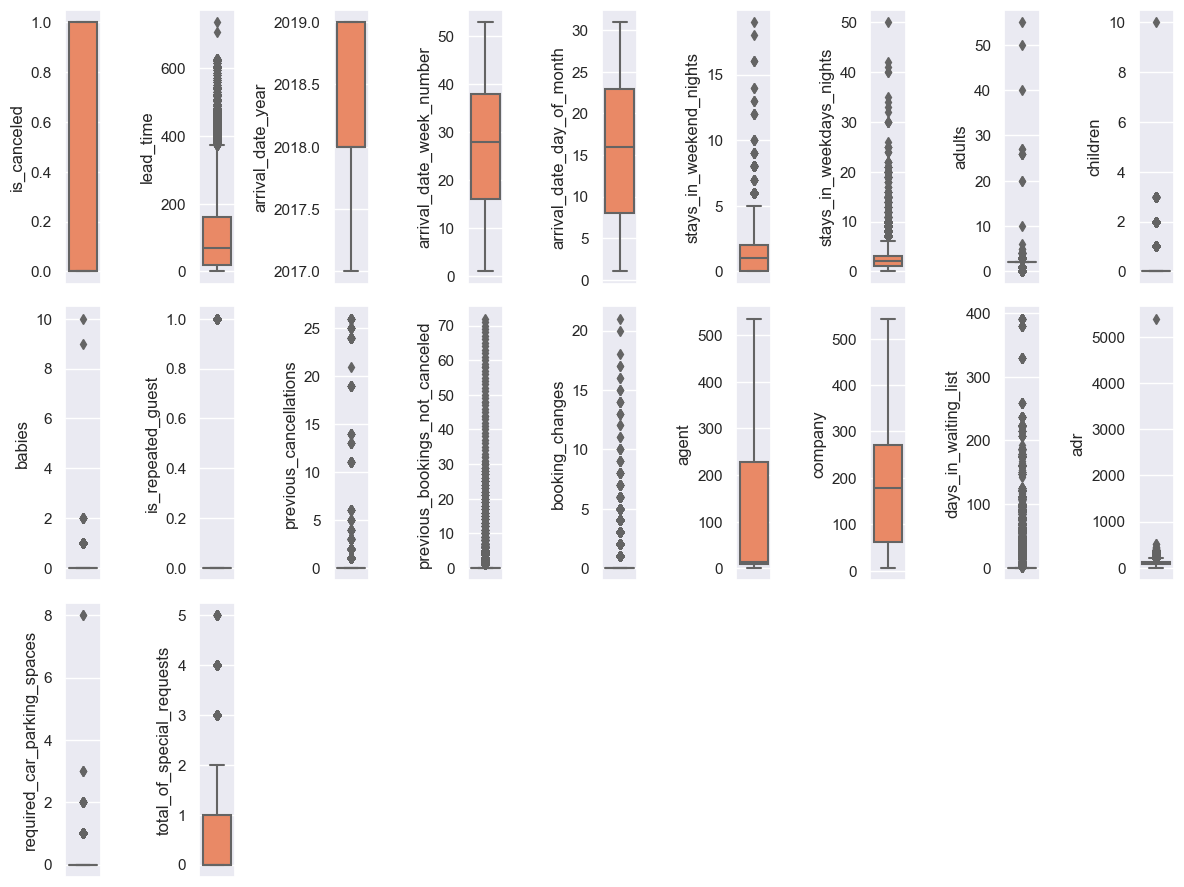

In [77]:

plt.figure(figsize=(12,12))
for i in range(len(numeric)):
    plt.subplot(4,9, i+1)
    sns.boxplot(data=df, y=numeric[i], color='coral')
    plt.tight_layout()

## HANDLING MISSING VALUE

In [78]:
sum_null = df.isna().sum()
null_ratio = df.isna().sum() / len(df) * 100
df_null = pd.DataFrame(data=sum_null, index=df.columns).reset_index()
df_null.columns = ['column','total_null']
df_null['ratio']  = null_ratio.values
df_null['dtype'] = df.dtypes.values
df_null

,column,total_null,ratio,dtype
0,hotel,0,0.000000,object
1,is_canceled,0,0.000000,int64
2,lead_time,0,0.000000,int64
3,arrival_date_year,0,0.000000,int64
4,arrival_date_month,0,0.000000,object
5,arrival_date_week_number,0,0.000000,int64
6,arrival_date_day_of_month,0,0.000000,int64
7,stays_in_weekend_nights,0,0.000000,int64
8,stays_in_weekdays_nights,0,0.000000,int64
9,adults,0,0.000000,int64


In [79]:
# Drop NaN missing value 'City' & 'children'
df = df.dropna(subset=['city'])
df = df.dropna(subset=['children'])
# Fill NaN 'agent' with median, because skewed distribution
df['agent']=df['agent'].fillna(df['agent'].median)
# Remove delete 'company', because missing values is too high
df = df.drop(['company'], axis=1)

In [80]:
sum_null = df.isna().sum()
null_ratio = df.isna().sum() / len(df) * 100
df_null = pd.DataFrame(data=sum_null, index=df.columns).reset_index()
df_null.columns = ['column','total_null']
df_null['ratio']  = null_ratio.values
df_null['dtype'] = df.dtypes.values
df_null

,column,total_null,ratio,dtype
0,hotel,0,0.0,object
1,is_canceled,0,0.0,int64
2,lead_time,0,0.0,int64
3,arrival_date_year,0,0.0,int64
4,arrival_date_month,0,0.0,object
5,arrival_date_week_number,0,0.0,int64
6,arrival_date_day_of_month,0,0.0,int64
7,stays_in_weekend_nights,0,0.0,int64
8,stays_in_weekdays_nights,0,0.0,int64
9,adults,0,0.0,int64


**Replace values ​​that have the same meaning**

In [81]:
print("Value Counts Before Replace\n\n",df['meal'].value_counts())
df['meal'] = df['meal'].replace('Undefined','No Meal')
print("\n\nValue Counts Before Replace\n\n",df['meal'].value_counts())

Value Counts Before Replace

 Breakfast     91863
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64


Value Counts Before Replace

 Breakfast     91863
Dinner        14434
No Meal       11803
Full Board      798
Name: meal, dtype: int64


In [82]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

**Discard Unnecessary Data**

In [83]:
# total_guests = adults, children, babies
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'] = df['total_guests'].astype('int64')
df = df.drop(columns=['adults','children','babies'])
df.reset_index(inplace=True)

In [84]:
print('before remove unnecassary data : ',df.shape)
print(df[df['total_guests']==0].shape) # terdapat 170 booking yang tidak mempunyai tamu/pengunjung (kemungkinan fiktif). sehingga kita drop

df = df[df['total_guests']>0]
df = df[df['is_canceled']==0] # Drop data yang cancel pesanan = 1

print('after remove unnecassary data : ',df.shape)

before remove unnecassary data :  (118898, 27)
(170, 27)
after remove unnecassary data :  (74590, 27)


In [85]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,0,Resort Hotel,0,342,2017,September,27,1,0,0,...,3,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2
1,1,Resort Hotel,0,737,2017,September,27,1,0,0,...,4,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2
2,2,Resort Hotel,0,7,2017,September,27,1,0,1,...,0,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,75.0,0,0,Check-Out,1
3,3,Resort Hotel,0,13,2017,September,27,1,0,1,...,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1
4,4,Resort Hotel,0,14,2017,September,27,1,0,2,...,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2


# Monthly Hotel Booking Analysis Based on Hotel Type
- Perbandingan terhadap data jumlah pemesanan hotel perbulannya berdasarkan tipe hotel, terdapat 2 tipe hotel (city, resort)
- Mengaitkan perbandingan data terhadap kondisi musim

In [86]:
print(df['arrival_date_year'].value_counts())
print(df['arrival_date_month'].value_counts())
print(df['hotel'].value_counts())

2018    36051
2019    24814
2017    13725
Name: arrival_date_year, dtype: int64
October      8604
September    7880
July         7091
December     6854
May          6566
June         6528
August       6384
November     6360
April        5304
January      4611
February     4347
March        4061
Name: arrival_date_month, dtype: int64
City Hotel      46082
Resort Hotel    28508
Name: hotel, dtype: int64


In [87]:
# df_total_booking = df.groupby(['arrival_date_year','arrival_date_month','hotel'])[['index']].count().reset_index()
# df_total_booking['arrival_date_month'] = pd.to_datetime( df_total_booking['arrival_date_month'], format='%B' ).dt.month
# df_total_booking.sort_values(by=['arrival_date_year','arrival_date_month'])

In [88]:
df_total_booking = pd.pivot_table( data=df,index=['arrival_date_month'],columns=['hotel','arrival_date_year'], values='index', aggfunc='count',fill_value=0 )
df_total_booking.reset_index(inplace=True)
df_total_booking.columns = ['arrival_date_month','2017 City Hotel','2018 City Hotel','2019 City Hotel',
                            '2017 Resort Hotel','2018 Resort Hotel','2019 Resort Hotel']
df_total_booking['arrival_date_month'] = pd.to_datetime( df_total_booking['arrival_date_month'], format='%B' ).dt.month
df_total_booking = df_total_booking.sort_values(by='arrival_date_month')

df_total_booking

,arrival_date_month,2017 City Hotel,2018 City Hotel,2019 City Hotel,2017 Resort Hotel,2018 Resort Hotel,2019 Resort Hotel
4,1,931,1743,0,900,1037,0
3,2,981,1396,0,939,1031,0
7,3,0,926,1323,0,732,1080
0,4,0,1436,1615,0,1080,1173
8,5,0,1933,2116,0,1374,1143
6,6,0,2020,1990,0,1323,1195
5,7,0,2237,2331,0,1311,1212
1,8,0,2201,2157,0,982,1044
11,9,457,2081,2232,1045,971,1094
10,10,1242,2123,2002,1031,1099,1107


In [89]:
df_total_booking_2017 = df_total_booking[['arrival_date_month','2017 City Hotel','2017 Resort Hotel']]
df_total_booking_2017 = df_total_booking_2017.melt(id_vars='arrival_date_month',var_name='Hotel',value_name='Total Bookings').sort_values(by='arrival_date_month')
df_total_booking_2017['Hotel'] = df_total_booking_2017['Hotel'].replace('2017 City Hotel','City Hotel')
df_total_booking_2017['Hotel'] = df_total_booking_2017['Hotel'].replace('2017 Resort Hotel','Resort Hotel')

df_total_booking_2018 = df_total_booking[['arrival_date_month','2018 City Hotel','2018 Resort Hotel']]
df_total_booking_2018 = df_total_booking_2018.melt(id_vars='arrival_date_month',var_name='Hotel',value_name='Total Bookings').sort_values(by='arrival_date_month')
df_total_booking_2018['Hotel'] = df_total_booking_2018['Hotel'].replace('2018 City Hotel','City Hotel')
df_total_booking_2018['Hotel'] = df_total_booking_2018['Hotel'].replace('2018 Resort Hotel','Resort Hotel')

df_total_booking_2019 = df_total_booking[['arrival_date_month','2019 City Hotel','2019 Resort Hotel']]
df_total_booking_2019 = df_total_booking_2019.melt(id_vars='arrival_date_month',var_name='Hotel',value_name='Total Bookings').sort_values(by='arrival_date_month')
df_total_booking_2019['Hotel'] = df_total_booking_2019['Hotel'].replace('2019 City Hotel','City Hotel')
df_total_booking_2019['Hotel'] = df_total_booking_2019['Hotel'].replace('2019 Resort Hotel','Resort Hotel')


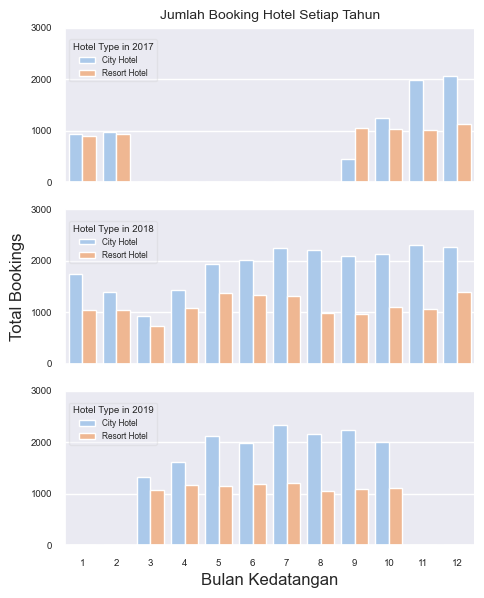

In [90]:
fig, ax = plt.subplots(3,1, figsize = (5,6), sharex=True)
plt.subplot(3, 1, 1)
sns.barplot(data=df_total_booking_2017, x='arrival_date_month', y='Total Bookings', hue='Hotel', palette='pastel')
plt.legend(title='Hotel Type in 2017', bbox_to_anchor=(0,0.95), loc='upper left',framealpha=0.3,fontsize=6,title_fontsize=7)
plt.ylim(0,3000)
plt.xlabel('')
plt.ylabel('')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.subplot(3, 1, 2)
sns.barplot(data=df_total_booking_2018, x='arrival_date_month', y='Total Bookings', hue='Hotel', palette='pastel')
plt.legend(title='Hotel Type in 2018', bbox_to_anchor=(0, 0.95), loc='upper left',framealpha=0.3, fontsize=6,title_fontsize=7)
plt.ylim(0,3000)
plt.xlabel('')
plt.ylabel('Total Bookings')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.subplot(3, 1, 3)
sns.barplot(data=df_total_booking_2019, x='arrival_date_month', y='Total Bookings', hue='Hotel', palette='pastel')
plt.legend('').set_visible(False)  # Menghilangkan legend
plt.ylim(0,3000)
plt.legend(title='Hotel Type in 2019', bbox_to_anchor=(0, 0.95), loc='upper left',framealpha=0.3,fontsize=6,title_fontsize=7)
plt.xlabel('Bulan Kedatangan')
plt.ylabel('')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

sns.despine(top=True)
plt.tight_layout()
ax[0].set_title('Jumlah Booking Hotel Setiap Tahun', fontsize=10)
plt.savefig('Jumlah Booking Hotel Setiap Tahun')

### Jumlah Pemesanan Hotel per Bulan (All Time)

In [91]:
df_total_booking_month = df_total_booking[['arrival_date_month']]
df_total_booking_month['Total Booking'] = (df_total_booking['2017 City Hotel']+df_total_booking['2018 City Hotel']+df_total_booking['2019 City Hotel']+
                                           df_total_booking['2017 Resort Hotel']+df_total_booking['2018 Resort Hotel']+df_total_booking['2019 Resort Hotel'])
df_total_booking_month

,arrival_date_month,Total Booking
4,1,4611
3,2,4347
7,3,4061
0,4,5304
8,5,6566
6,6,6528
5,7,7091
1,8,6384
11,9,7880
10,10,8604


Text(3.5, 12000, 'Minimum Total Booking 4061 ')

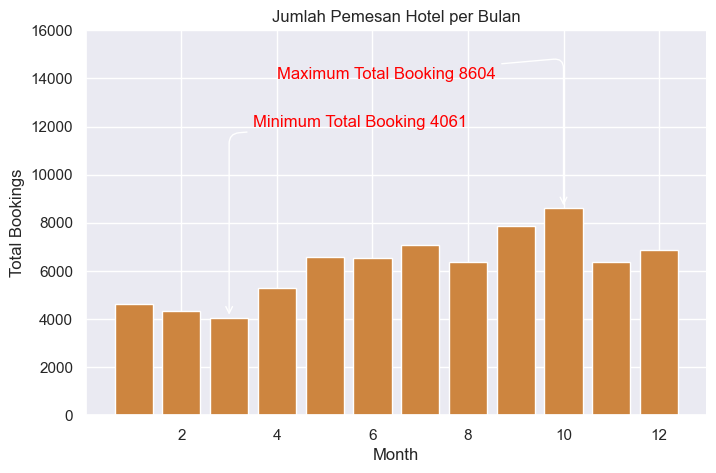

In [92]:
max_total_book = df_total_booking_month['Total Booking'].max()
min_total_book = df_total_booking_month['Total Booking'].min()

plt.figure(figsize=(8,5))
plt.bar(data=df_total_booking_month, x='arrival_date_month', height='Total Booking', color = 'peru')
plt.title('Jumlah Pemesan Hotel per Bulan')
plt.xlabel('Month')
plt.ylim(0,16000)
plt.ylabel('Total Bookings')
sns.despine(top=True, right=True)
plt.annotate(text=f'Maximum Total Booking {max_total_book}', xy=(10,max(df_total_booking_month['Total Booking'])), xytext=(4,14000),
             arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=5,angleB=90,rad=10"),color='red'
             )
plt.annotate(text=f'Minimum Total Booking {min_total_book} ', xy=(3,min(df_total_booking_month['Total Booking'])), xytext=(3.5,12000),
             arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=5,angleB=90,rad=10"),color='red'
             )


### Rata Rata Pemesanan Hotel Setiap Bulan

In [93]:
df.head(2)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,0,Resort Hotel,0,342,2017,September,27,1,0,0,...,3,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2
1,1,Resort Hotel,0,737,2017,September,27,1,0,0,...,4,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.0,0,0,Check-Out,2


In [94]:
df_avg_book = df.groupby(['arrival_date_year','arrival_date_month','hotel'])[['index']].count().reset_index()
df_avg_book.columns = ['arrival_date_year','arrival_date_month','hotel','total_booking']
df_avg_book = df_avg_book.groupby(['arrival_date_month','hotel']).agg({
    'arrival_date_year':'count',
    'total_booking':'sum'
}).sort_values(by='arrival_date_month').reset_index()
df_avg_book.head(4)

,arrival_date_month,hotel,arrival_date_year,total_booking
0,April,City Hotel,2,3051
1,April,Resort Hotel,2,2253
2,August,City Hotel,2,4358
3,August,Resort Hotel,2,2026


In [95]:
df_avg_book['arrival_date_month'] = pd.to_datetime(df_avg_book['arrival_date_month'], format='%B' ).dt.month
df_avg_book['avg_booking_per_month'] = df_avg_book['total_booking'] / df_avg_book['arrival_date_year']
df_avg_book.sort_values('arrival_date_month').reset_index()

,index,arrival_date_month,hotel,arrival_date_year,total_booking,avg_booking_per_month
0,8,1,City Hotel,2,2674,1337.000000
1,9,1,Resort Hotel,2,1937,968.500000
2,6,2,City Hotel,2,2377,1188.500000
3,7,2,Resort Hotel,2,1970,985.000000
4,15,3,Resort Hotel,2,1812,906.000000
5,14,3,City Hotel,2,2249,1124.500000
6,0,4,City Hotel,2,3051,1525.500000
7,1,4,Resort Hotel,2,2253,1126.500000
8,17,5,Resort Hotel,2,2517,1258.500000
9,16,5,City Hotel,2,4049,2024.500000


Text(0.5, 1.0, 'Rata Rata Pemesanan Hotel Per Bulan')

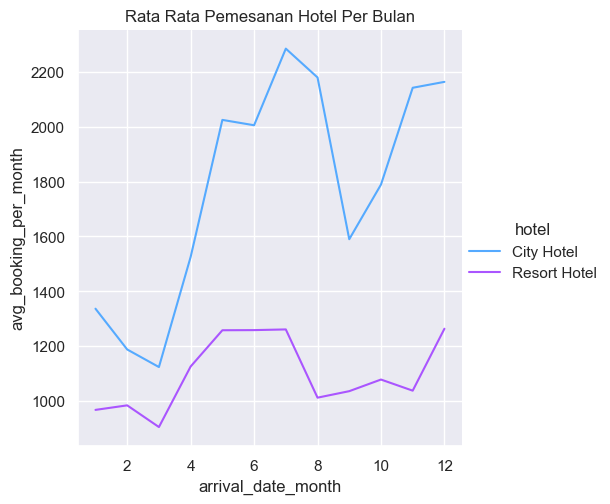

In [96]:
sns.set_theme(style="darkgrid", palette="pastel")
sns.relplot(data=df_avg_book, x='arrival_date_month', y='avg_booking_per_month', hue='hotel', kind='line',palette="cool")
plt.title('Rata Rata Pemesanan Hotel Per Bulan')

### Musim Terhadap Minat Memesan Hotel

In [97]:
musim = np.where((df_total_booking_month['arrival_date_month']>=11) | (df_total_booking_month['arrival_date_month']<=4), 'Hujan','Kemarau' )

Libur = np.where((df_total_booking_month['arrival_date_month']==12),'natal',
                 np.where((df_total_booking_month['arrival_date_month']==6),'lebaran','workday')
                  )

df_total_booking_month['musim'] = musim
df_total_booking_month['Libur_Kerja'] = Libur

df_total_booking_month

,arrival_date_month,Total Booking,musim,Libur_Kerja
4,1,4611,Hujan,workday
3,2,4347,Hujan,workday
7,3,4061,Hujan,workday
0,4,5304,Hujan,workday
8,5,6566,Kemarau,workday
6,6,6528,Kemarau,lebaran
5,7,7091,Kemarau,workday
1,8,6384,Kemarau,workday
11,9,7880,Kemarau,workday
10,10,8604,Kemarau,workday


In [98]:
df_musim = df_total_booking_month.groupby(['musim'])[['Total Booking']].sum()
df_musim = df_musim.reset_index()
df_musim

,musim,Total Booking
0,Hujan,31537
1,Kemarau,43053


In [99]:
df_libur_kerja = df_total_booking_month.groupby('Libur_Kerja')[['Total Booking']].mean()
df_libur_kerja = df_libur_kerja.reset_index()
df_libur_kerja

,Libur_Kerja,Total Booking
0,lebaran,6528.0
1,natal,6854.0
2,workday,6120.8


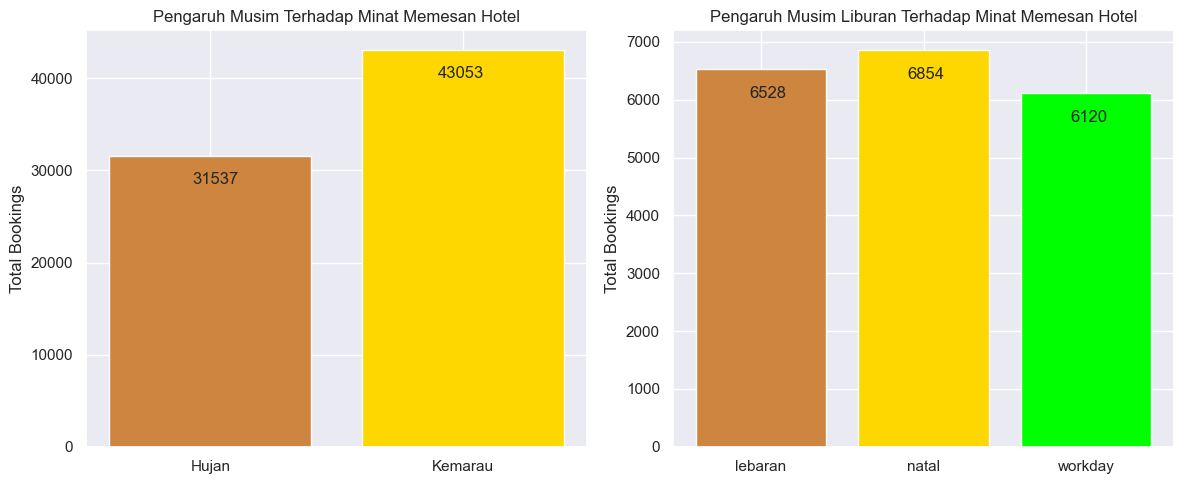

In [100]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
max_hujan = df_musim['Total Booking'].max()
min_hujan = df_musim['Total Booking'].min()
plt.bar(data=df_musim, x='musim', height='Total Booking', color=['peru','gold'])
plt.ylabel('Total Bookings')
plt.title('Pengaruh Musim Terhadap Minat Memesan Hotel')

plt.text(x=0.9, y=max_hujan-3000,s=f'{max_hujan}')
plt.text(x=-0.07, y=min_hujan-3000,s=f'{min_hujan}')



plt.subplot(1,2,2)
lebaran = int(df_libur_kerja['Total Booking'][0])
natal = int(df_libur_kerja['Total Booking'][1])
workday = int(df_libur_kerja['Total Booking'][2])
plt.bar(data=df_libur_kerja, x='Libur_Kerja', height='Total Booking', color=['peru','gold','lime'])
plt.ylabel('Total Bookings')
plt.title('Pengaruh Musim Liburan Terhadap Minat Memesan Hotel')
plt.text(x=-0.07, y=lebaran-500,s=f'{lebaran}')
plt.text(x=0.9, y=natal-500,s=f'{natal}')
plt.text(x=1.9, y=workday-500,s=f'{workday}')
plt.tight_layout()